# Seaborn

## Importando bibliotecas necessárias

git hub do seaborn tem vários datasets públicos
https://github.com/mwaskom/seaborn-data

Deixa os gráficos mais amigáveis e mais bonitos
Usa o matplotlib, o qual serve de backend por trás
É mais fácil tornar os gráficos bonitos no seaborn
seaborn foi criado para operar com DataFrame data=df_pinguins, x='comprimento_nadadeira_mm'

sns.set_theme() função para setar temas de gráficos

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_pinguins = sns.load_dataset('penguins')
df_pinguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [3]:
# Renomeando as colunas em português
columns = {
    'species': 'espécie',
    'island': 'ilha',
    'bill_length_mm': 'comprimento_bico_mm',
    'bill_depth_mm': 'profundidade_bico_mm',
    'flipper_length_mm': 'comprimento_nadadeira_mm',
    'body_mass_g': 'massa_corpo_g',
    'sex': 'sexo'
}
df_pinguins.rename(columns=columns, inplace=True)
df_pinguins.head(2)

,espécie,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corpo_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


### Visualização dos dados

In [4]:
# Ajuste gráfico
sns.set()

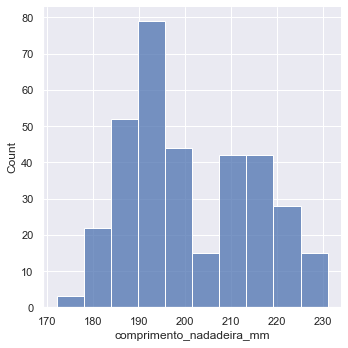

In [5]:
# Gráfico de distribuição por contagem
sns.displot(df_pinguins.comprimento_nadadeira_mm); 

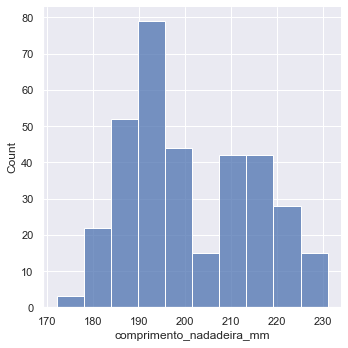

In [6]:
# Outra maneira
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm'); # note a contagem no y

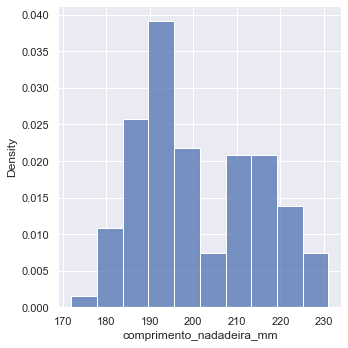

In [7]:
# Trocando contagem por densidade
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm', stat='density');

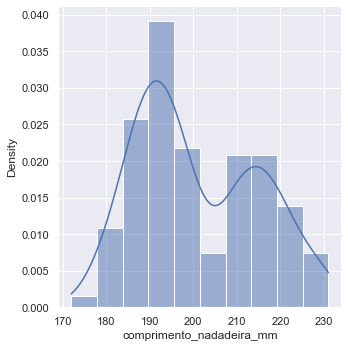

In [8]:
# Densidade com 'kernel density estimation' (kde)
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm', stat='density', kde=True); 

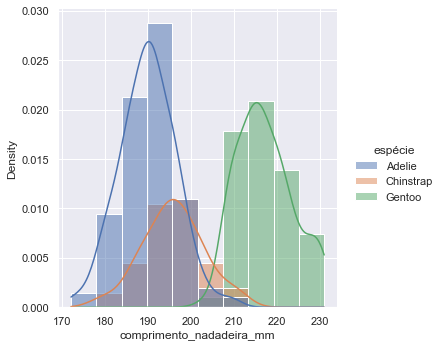

In [9]:
# Distribuição separando por uma categoria
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm',
            hue='espécie',
            stat='density', kde=True); 

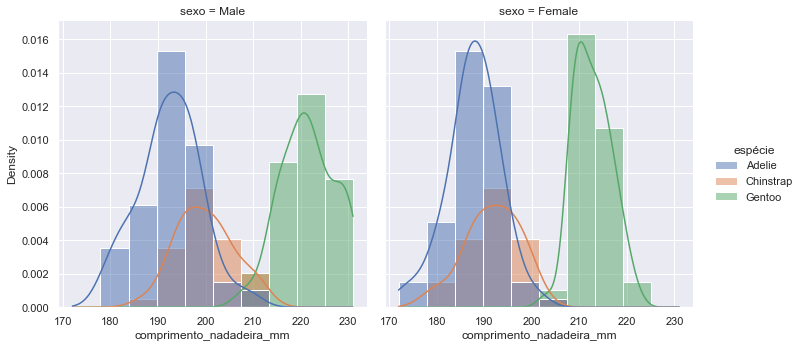

In [10]:
# Distribuição separando por duas categorias: 'hue' e 'col'
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm',
            hue='espécie',
            col='sexo',
            stat='density', kde=True); 

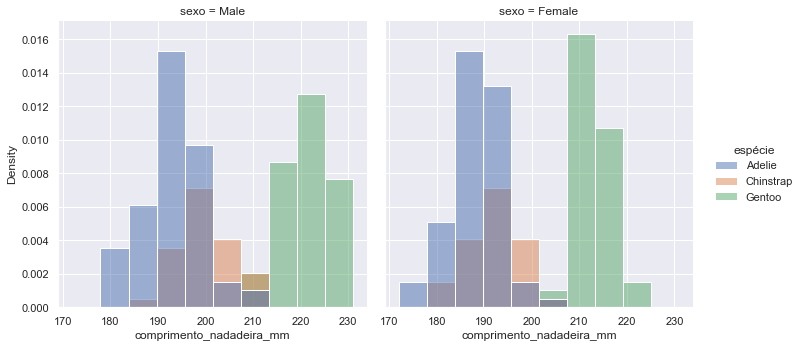

In [11]:
# Mesmo gráfico, retirando as curvas kde
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm',
            hue='espécie',
            col='sexo',
            stat='density');

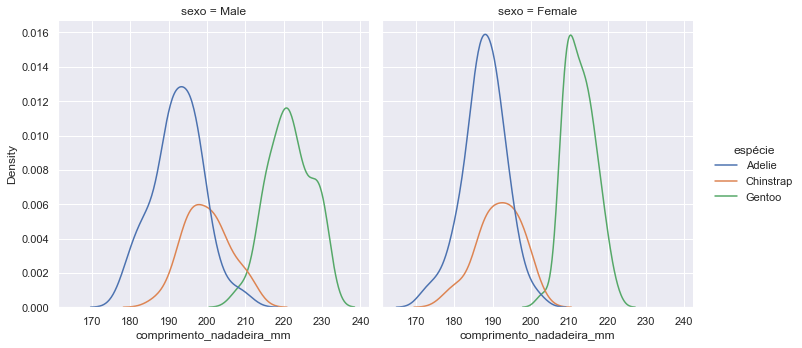

In [12]:
# Plotando somente as curvas kde
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm',
            hue='espécie',
            col='sexo',kind='kde'); #kernel density estimation (KDE)

### countplot

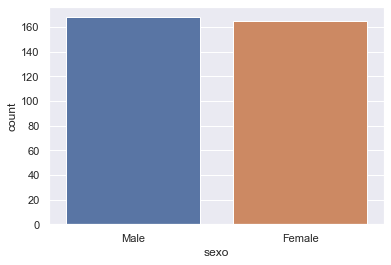

In [13]:
# Gráfico bom para detectar desbalanços no dataset
sns.countplot(data=df_pinguins, x='sexo'); 

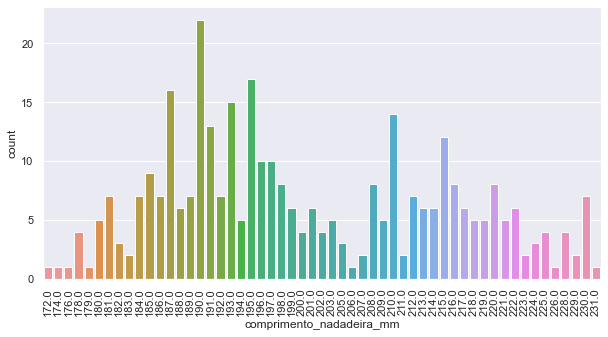

In [14]:
# Só pra ilustrar como count é mais apropriado para variáveis categóricas
# Com variável como 'comprimento_nadadeira_mm' geralmente usamos displot
plt.figure(figsize=(10,5))
sns.countplot(data=df_pinguins, x='comprimento_nadadeira_mm')
plt.xticks(rotation=90); 

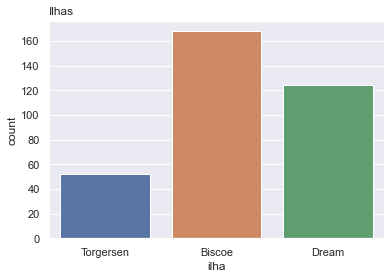

In [15]:
# Será que a distribuição dos pinguis é balanceado com relação às ilhas?
sns.countplot(data=df_pinguins, x='ilha'); 
plt.title('Ilhas',loc='left');

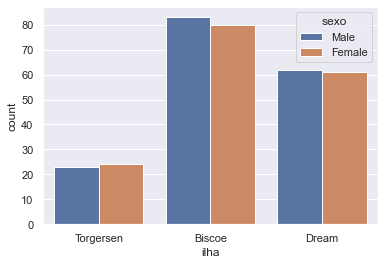

In [16]:
# Existe desbalanceamento entre as ilhas com relação ao sexo?
# Espera-se distribuição equilibrada
sns.countplot(data=df_pinguins, x='ilha', hue='sexo'); 

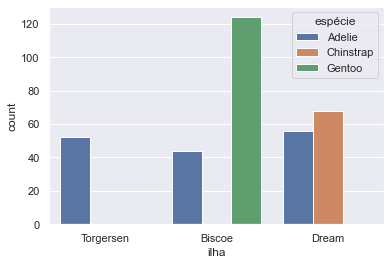

In [17]:
# Existe desbalanceamento entre as ilhas com relação à espécie?
# Pode-se esperar que sim
sns.countplot(data=df_pinguins, x='ilha', hue='espécie');

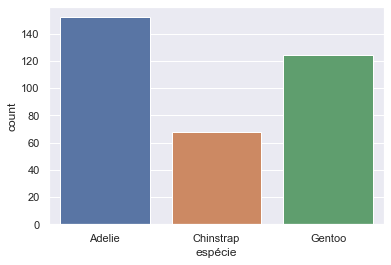

In [18]:
# Contagem geral por espécie
sns.countplot(data=df_pinguins, x='espécie');

### barplot

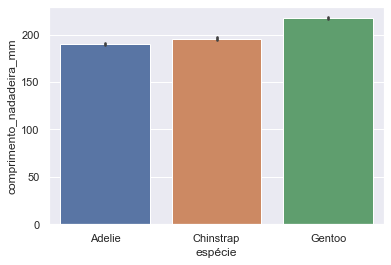

In [19]:
# Gráfico de colunas
sns.barplot(data=df_pinguins,x='espécie', y='comprimento_nadadeira_mm');

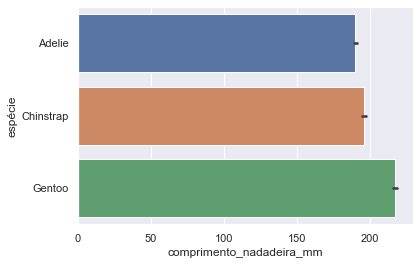

In [20]:
# Gráfico de barras
sns.barplot(data=df_pinguins,y='espécie', x='comprimento_nadadeira_mm');

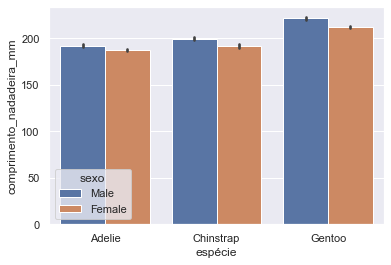

In [21]:
# Gráfico de colunas segmentado por categoria
sns.barplot(data=df_pinguins,x='espécie', y='comprimento_nadadeira_mm', hue='sexo');

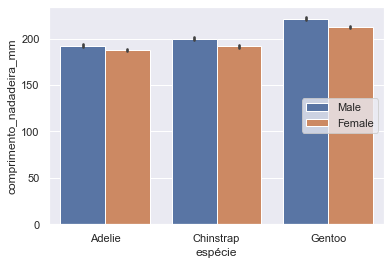

In [22]:
# Trocando a legenda de lugar
sns.barplot(data=df_pinguins,x='espécie', y='comprimento_nadadeira_mm', hue='sexo');
plt.legend(loc='right');

### boxplot

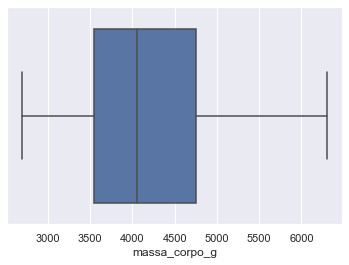

In [23]:
# Horizontal
sns.boxplot(data=df_pinguins, x='massa_corpo_g'); 

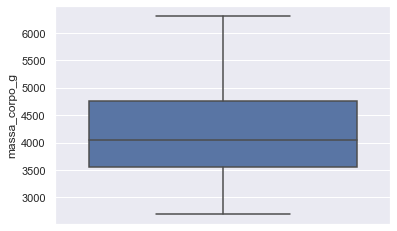

In [24]:
# Vertical
sns.boxplot(data=df_pinguins, y='massa_corpo_g');

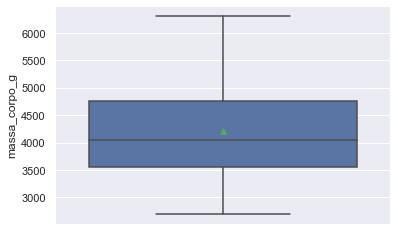

In [25]:
# Indicando a média (mais abaixo vemos como trocar a cor do ponto)
sns.boxplot(data=df_pinguins, y='massa_corpo_g',showmeans=True);

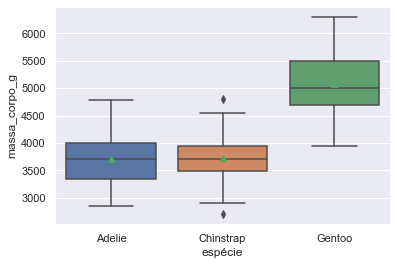

In [26]:
# Separando por categoria e mostrando as médias
sns.boxplot(data=df_pinguins, y='massa_corpo_g',x='espécie', showmeans=True);

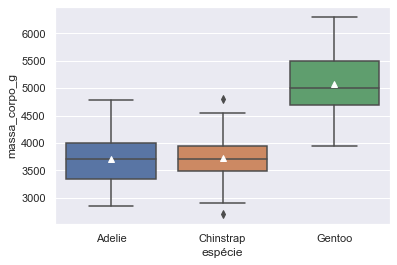

In [27]:
# Configurando a cor dos pontos
sns.boxplot(data=df_pinguins, y='massa_corpo_g',x='espécie', showmeans=True,
            meanprops={"markerfacecolor":"white", "markeredgecolor":"white"}
);

### pointplot

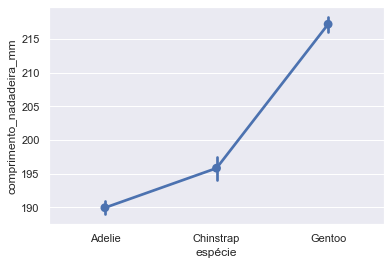

In [28]:
sns.pointplot(data=df_pinguins, x='espécie', y='comprimento_nadadeira_mm');

### violinplot

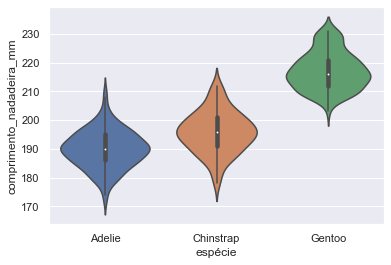

In [29]:
sns.violinplot(data=df_pinguins, x='espécie', y='comprimento_nadadeira_mm');

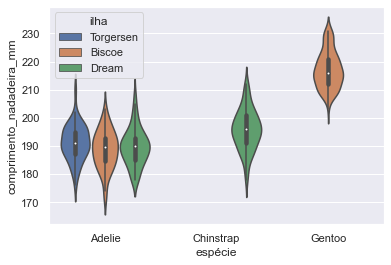

In [30]:
sns.violinplot(data=df_pinguins, x='espécie', y='comprimento_nadadeira_mm',hue='ilha');

### lmplot

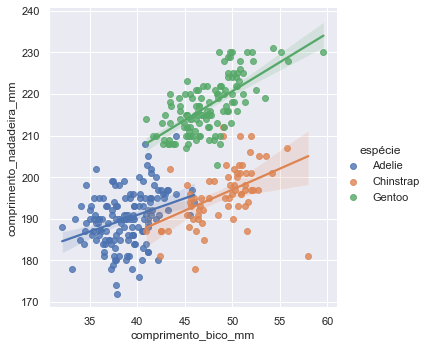

In [31]:
# Plot com regressões lineares - linear model
sns.lmplot(data=df_pinguins, x='comprimento_bico_mm', y='comprimento_nadadeira_mm',hue='espécie');

### heatmap

In [32]:
# Correlações entre variáveis
df_pinguins.corr()

,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corpo_g
comprimento_bico_mm,1.000000,-0.235053,0.656181,0.595110
profundidade_bico_mm,-0.235053,1.000000,-0.583851,-0.471916
comprimento_nadadeira_mm,0.656181,-0.583851,1.000000,0.871202
massa_corpo_g,0.595110,-0.471916,0.871202,1.000000


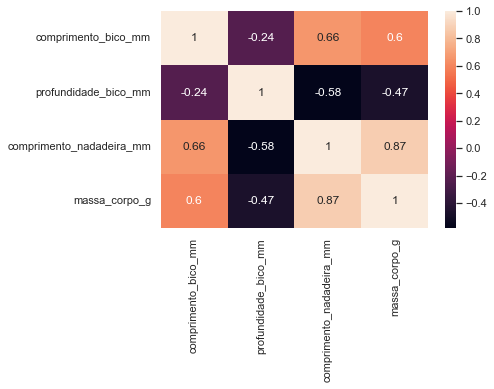

In [33]:
# Podemos fazer um mapa de calor com as correlações 
sns.heatmap(df_pinguins.corr(),annot=True); 

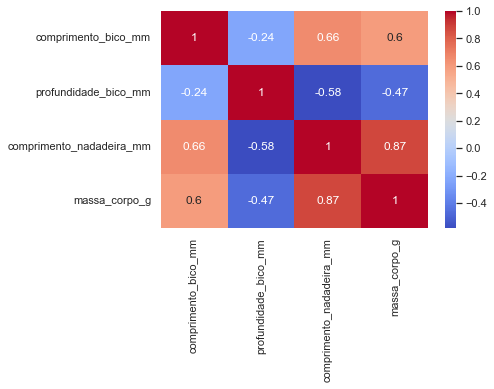

In [34]:
# Podemos configurar o mapa de cores 
sns.heatmap(df_pinguins.corr(),annot=True, cmap='coolwarm'); 